# 13. Expanding your R Skills

Throughout this book, we have covered some popular packages as well as many of the specific functions from these packages. However, it would be impossible to cover all of the packages, functions, and options that R has. As you start to apply the tools from this book to your own work or in new settings, you may need to install and use new packages or encounter some unexpected errors. Practicing reading package documentation and responding to error messages will help you be able to expand your R skills beyond the topics covered here. 

We will demonstrate these skills using the `stringr` package, which is a package that is part of the tidyverse and has several functions for dealing with text data. 

In [1]:
suppressPackageStartupMessages(library(tidyverse))

## Reading Documentation for New Packages

Every published package has a CRAN website. This website contains a reference manual that contains the documentation for the functions and data available in the package. Most often, the website also includes useful vignettes that give examples of how to use the functions in the package. The site also tells you what the requirements for using the package are, who the authors of the package are, and when the package was last updated. For example, take a look at the CRAN site for [stringr](https://cran.r-project.org/web/packages/stringr/index.html) and read the vignette [Introduction to String R](https://cran.r-project.org/web/packages/stringr/vignettes/stringr.html). 

We will use this `stringr` package to clean up text related to a PubMed search query for a systematic review. An example search query is given below and is taken from [Adatia et al. (2021). Out-of-hospital cardiac arrest: a systematic review of current risk scores to predict survival. American heart journal, 234, 31-41](https://www.sciencedirect.com/science/article/abs/pii/S0002870320304130). Our first goal will be to extract the actual search query from the text along with all the terms used in the query. We can assume that the search query will either be fully contained in parentheses or will be a sequence of paranthetical phrases connected with AND or OR. Our goal is to extract the search query as well as all the individual search terms used in the query, but we have to get there in a series of steps.

In [2]:
sample_str <- " A systematic search will be performed in PubMed, Embase, and the 
Cochrane Library, using the following search query:   ('out-of-hospital cardiac 
arrest' OR 'OHCA') AND ('MIRACLE 2' OR 'OHCA' OR 'CAHP' OR 'C-GRAPH' OR 'SOFA' 
OR 'APACHE' OR 'SAPS’ OR ’SWAP’ OR ’TTM’)."

The first thing we want to do with the text is clean up the whitespace by removing any trailing, leading, or repeated spaces. In our example, the string starts with a trailing space and there are also multiple spaces right before the search query. Searching for "whitespace" in the stringr reference manual, we find the `str_trim()` and `str_squish()` functions. Read the documentation for these two functions. You should find that `str_squish()` is the function we are looking for and that it takes a single argument. 

In [3]:
sample_str <- str_squish(sample_str)
sample_str

[1] "A systematic search will be performed in PubMed, Embase, and the Cochrane Library, using the following search query: ('out-of-hospital cardiac arrest' OR 'OHCA') AND ('MIRACLE 2' OR 'OHCA' OR 'CAHP' OR 'C-GRAPH' OR 'SOFA' OR 'APACHE' OR 'SAPS’ OR ’SWAP’ OR ’TTM’)."

## Trying Simple Examples

The premise above is a good example of starting with a simple case. Rather than applying your function to your full data set right away, you want to first make sure that you understand how it works on a simple example on which you can anticipate what the outcome should look like. My next task will be to split the text into words and store this as a character vector. Read the documentation to determine why I used the `str_split_1()` function below. I then double check that the returned result is indeed a vector and print the result.

In [4]:
sample_str_words <- str_split_1(sample_str, " ")
class(sample_str_words)
sample_str_words

[1] "character"

[1] "A"                 "systematic"        "search"           
 [4] "will"              "be"                "performed"        
 [7] "in"                "PubMed,"           "Embase,"          
[10] "and"               "the"               "Cochrane"         
[13] "Library,"          "using"             "the"              
[16] "following"         "search"            "query:"           
[19] "('out-of-hospital" "cardiac"           "arrest'"          
[22] "OR"                "'OHCA')"           "AND"              
[25] "('MIRACLE"         "2'"                "OR"               
[28] "'OHCA'"            "OR"                "'CAHP'"           
[31] "OR"                "'C-GRAPH'"         "OR"               
[34] "'SOFA'"            "OR"                "'APACHE'"         
[37] "OR"                "'SAPS’"            "OR"               
[40] "’SWAP’"            "OR"                "’TTM’)."

We now want to identify words in this vector that have starting and/or end parantheses. The function `grepl()` takes in a character vector `x` and a pattern to search for. It returns a logical vector for whether or not each element of `x` has a match for that pattern.

In [5]:
grepl(sample_str_words, ")")

Warning message in grepl(sample_str_words, ")"):
“argument 'pattern' has length > 1 and only the first element will be used”


[1] FALSE

Huh, that didn't match what I expected! I expected to have multiple TRUE/FALSE values outputted - one for each word. Let's read the documentation again. 

## Deciphering Error Messages and Warnings

The warning message above will give us a good clue for what went wrong. It says that the inputted pattern has length > 1. However, the pattern I gave it is a single character. In fact, I specified the arguments in the wrong order. Let's try again. This time I specify `x` and `pattern`. 

In [6]:
grepl(x=sample_str_words, pattern=")")

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE  TRUE

That worked! However, it won't work if we change that to a starting parantheses. Try it out for yourself to see this. The error message says that it is looking for an end parantheses. In this case, the documentation does not help us. Let's try googling "stringr find start parentheses". The first search result for me is a [stack overflow question](https://stackoverflow.com/questions/56174805/how-to-search-for-strings-with-parentheses-in-r) that helps us out. We read that we need to use backslashes to tell R to read the parentheses literally rather than as a special character used in a regular expression. 

In [7]:
grepl(x=sample_str_words, pattern="\\(")

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
[25]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE

When a function doesn't return what we expect it to, it is a good idea to first test whether the arguments we gave it match what we expect, then to re-read the documentation, and then to look for other resources for help. For example, we could check that `sample_str_words` is indeed a character vector, then re-read the `stringr` documentation, and then google our problem. 

### Debugging Code 

The code below is supposed to extract the search query from the text as well as find the invididual search terms used in the query. However, the code is incorrect. You can try out to two test strings given to see why the code output is wrong. Practice reading through the code to understand what it is trying to do. The comments are there to help explain the steps, but you may also want to print the output to figure out what it is doing.

In [8]:
sample_strA <- " A systematic search will be performed in PubMed, Embase, and the 
Cochrane Library, using the following search query:   ('out-of-hospital cardiac 
arrest' OR 'OHCA') AND ('MIRACLE 2' OR 'OHCA' OR 'CAHP' OR 'C-GRAPH' OR 'SOFA' 
OR 'APACHE' OR 'SAPS’ OR ’SWAP’ OR ’TTM’)."

sample_strB <- "Searches will be conducted in MEDLINE via PubMed, Web of Science,
Scopus and Embase. The following search strategy will be 
used:(child OR infant OR preschool child OR preschool children OR preschooler
OR pre-school child OR pre-school children OR pre school child OR pre school 
children OR pre-schooler OR pre schooler OR children OR adolescent OR adolescents)AND
(attention deficit disorder with hyperactivity OR ADHD OR attention deficit
disorder OR ADD OR hyperkinetic disorder OR minimal brain disorder) Submitted "

In [9]:
sample_str <- sample_strB

# separate parentheses, remove extra whitespace, and split into words
sample_str <- str_replace(sample_str, "\\)", " \\) ")
sample_str <- str_replace(sample_str, "\\(", " \\( ")
sample_str <- str_squish(sample_str)
sample_str_words <- str_split_1(sample_str, " ")

# find indices with parentheses 
end_ps <- grepl(x=sample_str_words, pattern="\\)")
start_ps <- grepl(x=sample_str_words, pattern="\\(")

# find words between first and last parentheses 
search_query <- sample_str_words[ which(end_ps)[1]:which(start_ps)[1]]
search_query <- paste(search_query, collapse=" ")
search_query

# find search terms
search_terms <- str_replace_all(search_query, "\\)", "")
search_terms <- str_replace_all(search_query, "\\(", "")
sample_terms <- str_squish(search_query)
search_terms <- str_split_1(search_terms, " AND | OR ")
search_terms

[1] ") adolescents OR adolescent OR children OR schooler pre OR pre-schooler OR children school pre OR child school pre OR children pre-school OR child pre-school OR preschooler OR children preschool OR child preschool OR infant OR child ("

[1] ") adolescents"       "adolescent"          "children"           
 [4] "schooler pre"        "pre-schooler"        "children school pre"
 [7] "child school pre"    "children pre-school" "child pre-school"   
[10] "preschooler"         "children preschool"  "child preschool"    
[13] "infant"              "child "

## Video Solution

We will show how we can test and fix the code above by using some simple debugging principles. 

<div class="video-container">
    <iframe width="700" height="500" src="https://www.youtube.com/embed/2yfjXyAbbK8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
</div>

## General Programming Tips

As you write more complex code and functions, it is inevitable that you will run into errors or unexpected behavior. Below are some simple principles that are applicable to debugging in any setting. When it comes to testing code, a good mantra is *test early and test often*. So, try to avoid writing too much code before running and checking that the results match what you expect. 

  1.  Check that all parentheses (), brackets [], and curly braces {} match.  
  2.  Check that object names are correct.   
  3.  Check whether you use the same name for different objects or whether you use different names for the same object. You can do this by using the `ls()` function to find all current objects. 
  4.  Check that the input arguments to a function match what is expected.  
  5.  Try simple examples first. You can use the documentation or vignette examples for ideas. 
  6.  Localize your error by checking the values of objects at different points.  
  7.  Modify your code one piece at a time before checking it to avoid introducing new errors.  
  8.  Google error messages you don't understand. R's messages can sometimes hint at what the error might stem from, but they are not always direct.

## Exercises


1. Suppose we want to replace the words "Thank you" in the following string with the word "Thanks". Why does the below code fail? How can we correct it?

In [10]:
string <- "Congratulations on finishing the book! Thank you for reading it."
str_sub(string, c(35, 42)) <- "Thanks"
string

[1] "Congratulations on finishing the bThanks"       
[2] "Congratulations on finishing the book! ThThanks"

In [11]:
# didn't count the spaces, and
# entered the start and end positions as a vector instead of two separate inputs 
string <- "Congratulations on finishing the book! Thank you for reading it."
str_sub(string, start = 40, end = 48) <- "Thanks"
string

[1] "Congratulations on finishing the book! Thanks for reading it."

2. The code below uses the `NHANESsample` data from the `RforHDSdata` package. The goal of the code is to plot the worst diastolic blood pressure reading against the worst systolic blood pressure reading for each patient, colored by hypertension status. However, the code currently generates an error message. What is wrong with the code below? There are four errors for you to identify and fix.

In [12]:
library(RforHDSdata)
data(NHANESsample)

nhanes_df <- NHANESsample %>% mutate(worst_DBP = max(DBP1, DBP2, DBP3, DBP4),
                                     worst_SBP = max(SBP1, SBP2, SBP3, SBP4))

ggplot() %>% geom_point(data = nhanes_df, aes(x = worst_DBP, y = worst_SBP), color = HYP)

ERROR: Error: object 'HYP' not found


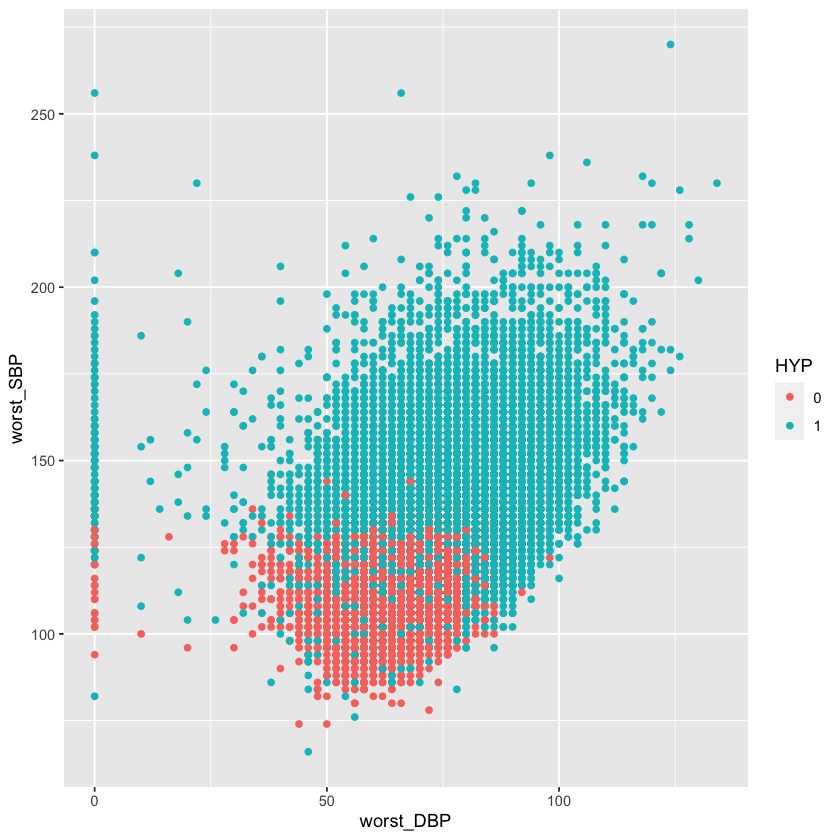

In [13]:
#errors are using max instead of pmax,
#not removing NA values, 
#putting color outside the aesthetic,
#piping instead of adding

nhanes_df <- NHANESsample %>% mutate(worst_DBP = pmax(DBP1, DBP2, DBP3, DBP4, na.rm = T),
                                     worst_SBP = pmax(SBP1, SBP2, SBP3, SBP4, na.rm = T))
nhanes_df$HYP <- as.factor(nhanes_df$HYP)

ggplot(nhanes_df) + geom_point(aes(x = worst_DBP, y = worst_SBP, color = HYP))

3. Now, suppose we want to create a calibration plot from the following model, following the code from [Chapter 11](https://alicepaul.github.io/r-for-health-data-science/book/11_logistic_regression.html). What is wrong with the code below? Debug it. Hint: there are three separate errors.

In [14]:
model <- glm(diagnosis ~ smoothness_worst + symmetry_mean + texture_se + radius_mean,
                 data = breastcancer, family = binomial)

pred_probs <- predict(model)

num_cuts <- 10
calib_data <-  data.frame(prob = pred_probs,
                          bin = cut(pred_probs, breaks = num_cuts),
                          class = mod_start$y)

calib_data <- calib_data %>% 
             group_by(bin) %>% 
             summarize(observed = sum(class)/n(), 
                       expected = sum(prob)/n(), 
                       se = sqrt(observed*(1-observed)/n()))
calib_data

ggplot(calib_data) + 
  geom_abline(intercept = 0, slope = 1, color="red") + 
  geom_errorbar(aes(x = expected, ymin=observed-1.96*se, 
                    ymax=observed+1.96*se), 
                colour="black", width=.01)+
  geom_point(aes(x = expected, y = observed)) +
  labs(x="Expected Proportion", y="Observed Proportion") +
  theme_minimal()

ERROR: Error in eval(family$initialize): y values must be 0 <= y <= 1


[1] "id"                      "diagnosis"              
 [3] "radius_mean"             "texture_mean"           
 [5] "perimeter_mean"          "area_mean"              
 [7] "smoothness_mean"         "compactness_mean"       
 [9] "concavity_mean"          "concave_points_mean"    
[11] "symmetry_mean"           "fractal_dimension_mean" 
[13] "radius_se"               "texture_se"             
[15] "perimeter_se"            "area_se"                
[17] "smoothness_se"           "compactness_se"         
[19] "concavity_se"            "concave_points_se"      
[21] "symmetry_se"             "fractal_dimension_se"   
[23] "radius_worst"            "texture_worst"          
[25] "perimeter_worst"         "area_worst"             
[27] "smoothness_worst"        "compactness_worst"      
[29] "concavity_worst"         "concave_points_worst"   
[31] "symmetry_worst"          "fractal_dimension_worst"

bin,observed,expected,se
<fct>,<dbl>,<dbl>,<dbl>
"(-0.001,0.0909]",0.01333333,0.01549559,0.006622073
"(0.0909,0.182]",0.11538462,0.12584182,0.062656268
"(0.182,0.273]",0.25000000,0.21029868,0.125000000
"(0.273,0.364]",0.16666667,0.32413867,0.107582871
"(0.364,0.455]",0.71428571,0.40195442,0.170746944
"(0.455,0.545]",0.60000000,0.50139977,0.154919334
"(0.545,0.636]",0.60000000,0.59950487,0.154919334
"(0.636,0.727]",0.57142857,0.69641348,0.187043906
"(0.727,0.818]",0.77777778,0.76670533,0.138579903


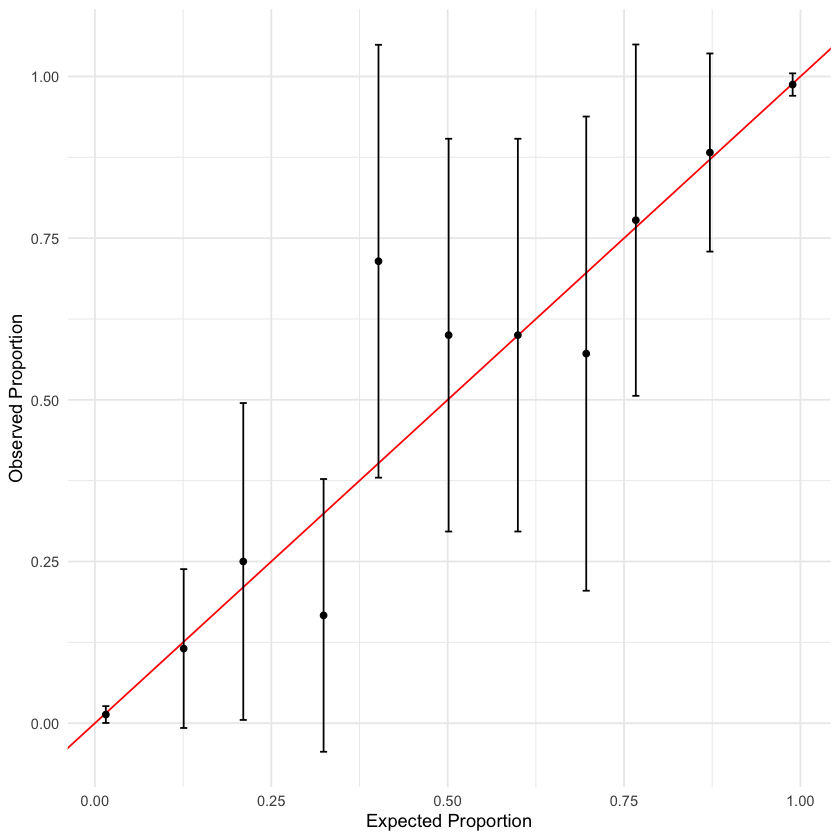

In [15]:
#errors are not changing the diagnosis variable to 0/1
#predicting the OR instad of the probabilities, 
#and copying over the calibration code without changing the model name 

library(RforHDSdata)
data(breastcancer)
names(breastcancer)

breastcancer <- breastcancer %>% mutate(diagnosis = case_when(diagnosis == "M" ~ 1, 
                              diagnosis == "B" ~ 0))

model <- glm(diagnosis ~ smoothness_worst + symmetry_mean + texture_se + radius_mean,
                 data = breastcancer, family = binomial)

pred_probs <- predict(model, type="response")

num_cuts <- 11
calib_data <-  data.frame(prob = pred_probs,
                          bin = cut(pred_probs, breaks = num_cuts),
                          class = model$y)

calib_data <- calib_data %>% 
             group_by(bin) %>% 
             summarize(observed = sum(class)/n(), 
                       expected = sum(prob)/n(), 
                       se = sqrt(observed*(1-observed)/n()))
calib_data

ggplot(calib_data) + 
  geom_abline(intercept = 0, slope = 1, color="red") + 
  geom_errorbar(aes(x = expected, ymin=observed-1.96*se, 
                    ymax=observed+1.96*se), 
                colour="black", width=.01)+
  geom_point(aes(x = expected, y = observed)) +
  labs(x="Expected Proportion", y="Observed Proportion") +
  theme_minimal()